In [ ]:
#Libraries

import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
def extract_tabular_data(file_path: str):
    """Extract data from a tabular file_format, with pandas."""
    if file_path.endswith(".csv"):
       return pd.read_csv(file_path)
    elif file_path.endswith(".parquet"):
        return pd.read_parquet(file_path)
    else: 
        raise Exception("Warning: Invalid file extension. Please try with .csv or .parquet!")

In [5]:
def extract_json_data(file_path):
    """Extract and flatten data from a JSON file."""
    with open(file_path, 'r') as json_file:
        raw_data=json.load(json_file)
        
    return pd.json_normalize(raw_data)

In [ ]:
def transform_electricity_sales_data(raw_data: pd.DataFrame):
    """
    Transform electricity sales to find the total amount of electricity sold
    in the residential and transportation sectors.
    
    To transform the electricity sales data, you'll need to do the following:
    - Drop any records with NA values in the `price` column. Do this inplace.
    - Only keep records with a `sectorName` of "residential" or "transportation".
    - Create a `month` column using the first 4 characters of the values in `period`.
    - Create a `year` column using the last 2 characters of the values in `period`.
    - Return the transformed `DataFrame`, keeping only the columns `year`, `month`, `stateid`, `price` and `price-units`.
    """
    raw_data.dropna(subset=["price"], inplace=True)
    cleaned_data = raw_data[raw_data["sectorName"].isin(['residential', 'transportation', 'industrial'])]

    cleaned_data = cleaned_data.drop(columns=["stateid", "sectorid"])
    
    return cleaned_data[["period", "stateDescription", "sectorName", "price", "price-units"]]

In [7]:
def load(dataframe: pd.DataFrame, file_path: str):
    """Load a DataFrame to a file in either CSV or Parquet format."""
    if file_path.endswith(".csv"):
        return dataframe.to_csv(file_path)
    elif file_path.endswith(".parquet"):
        return dataframe.to_parquet(file_path)
    else: 
        return Exception("Warning: {filepath} is not a valid file type. Please try again!_")
    

In [19]:
raw_electricity_capability_df = extract_json_data("electricity_capability_nested.json")
raw_electricity_sales_df = extract_tabular_data("electricity_sales.csv")

raw_electricity_sales_df.head()

,period,stateid,stateDescription,sectorid,sectorName,price,price-units
0,2023-12,HI,Hawaii,TRA,transportation,0.00,cents per kilowatt-hour
1,2023-12,ID,Idaho,ALL,all sectors,9.46,cents per kilowatt-hour
2,2023-12,ID,Idaho,COM,commercial,8.88,cents per kilowatt-hour
3,2023-12,ID,Idaho,IND,industrial,6.21,cents per kilowatt-hour
4,2023-12,ID,Idaho,OTH,other,NaN,cents per kilowatt-hour


In [ ]:
#Cheching for missing values 
raw_electricity_sales_df.isnull().sum()

period                0
stateid               0
stateDescription      0
sectorid              0
sectorName            0
price               806
price-units           0
dtype: int64

In [20]:
raw_electricity_sales_df.describe(include='object')

,period,stateid,stateDescription,sectorid,sectorName,price-units
count,4836,4836,4836,4836,4836,4836
unique,13,62,62,6,6,1
top,2023-12,HI,Hawaii,TRA,transportation,cents per kilowatt-hour
freq,372,78,78,806,806,4836


In [26]:
raw_electricity_sales_df['stateDescription'].unique()

array(['Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Wyoming',
       'New England', 'Middle Atlantic', 'East North Central',
       'West North Central', 'South Atlantic', 'East South Central',
       'West South Central', 'Mountain', 'Massachusetts', 'Michigan',
       'Minnesota', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Pacific Contiguous',
       'Pacific Noncontiguous', 'U.S. Total', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Mississippi', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Missouri',
       'Montana', 'Nebraska', 'New Hampshire', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Alabama', 'Alaska', 'Ohio',
       'Oklahoma', 'Rhode Island', 'South Carolina', 'Oregon',
       'Pennsylvania', 'Nevada'], dtype=object)

In [44]:
raw_electricity_sales_df['sectorName'].value_counts()

transportation    806
all sectors       806
commercial        806
industrial        806
residential       806
Name: sectorName, dtype: int64

In [28]:
cleaned_electricity_sales_df = transform_electricity_sales_data(raw_electricity_sales_df)
#load(cleaned_electricity_sales_df, "loaded__electricity_sales.csv")

cleaned_electricity_sales_df.head()

,period,stateDescription,sectorName,price,price-units
0,2023-12,Hawaii,transportation,0.00,cents per kilowatt-hour
3,2023-12,Idaho,industrial,6.21,cents per kilowatt-hour
5,2023-12,Idaho,residential,11.53,cents per kilowatt-hour
6,2023-12,Idaho,transportation,0.00,cents per kilowatt-hour
9,2023-12,Illinois,industrial,8.10,cents per kilowatt-hour


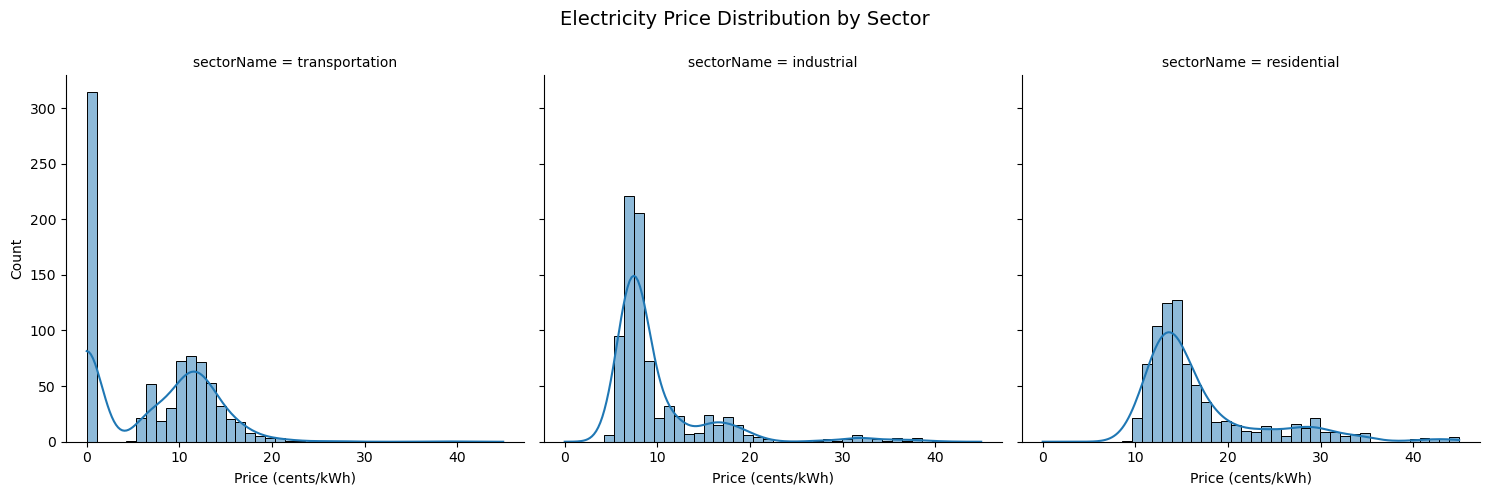

In [50]:
g = sns.displot(data=cleaned_electricity_sales_df, x="price",col="sectorName",kde=True)
g.fig.suptitle("Electricity Price Distribution by Sector", fontsize=14) # add a title

g.set_axis_labels("Price (cents/kWh)", "Count")

g.fig.tight_layout()
g.fig.subplots_adjust(top=0.85)

plt.show()